>Jacob Lustig-Yaeger   

# Continuous spectrum from the solar atmosphere  
We now turn to the formation of the solar continuum radiation, concentrating on the visible and near-
infrared parts of its spectrum.  

## 1. Observed solar continua  

We'll get started by importing some necessary python packages and defining some astrophysical quantities.

In [2]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np; import scipy as sp; import matplotlib as mpl
import matplotlib.pyplot as plt; from matplotlib import gridspec
from matplotlib import rc; from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}); mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)
G = 6.67e-8           # Gravitational constant

Table 5 specifies the continuum radiation emitted by the sun between 0.2 - 5 microns, taken from Allen (1976). These data are in the file `solspect.dat`, which looks like:

In [3]:
! head solspect.dat

  0.20  0.02  0.04  0.03  0.04
  0.22  0.07  0.11  0.14  0.20
  0.24  0.09  0.2   0.18  0.30
  0.26  0.19  0.4   0.37  0.5
  0.28  0.35  0.7   0.59  1.19
  0.30  0.76  1.36  1.21  2.15
  0.32  1.10  1.90  1.61  2.83
  0.34  1.33  2.11  1.91  3.01
  0.36  1.46  2.30  2.03  3.20
  0.37  1.57  2.50  2.33  3.62


**Write code to read Table 5.**

In [4]:
solspect = np.genfromtxt('solspect.dat')

# Wavelength (microns):
lam = solspect[:,0]
# Astrophysical flux at the solar surface with spectral irregularities smoothed:
Flam = solspect[:,1] * 1e10
# Astrophysical flux at the solar surface for the continuum between lines:
Flamp = solspect[:,2] * 1e10
# Radially emergent intensity at the solar surface with spectral irregularities smoothed:
Ilam = solspect[:,3] * 1e10
# Radially emergent intensity at the solar surface for the continuum between lines:
Ilamp = solspect[:,4] * 1e10

Plot the four spectral distributions together in one figure. Use a statement to check that the continuum intensity reaches $I_{\lambda}^c = 4.6 \times 10^{10}$ erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$ at $\lambda = 0.41 \mu$m.

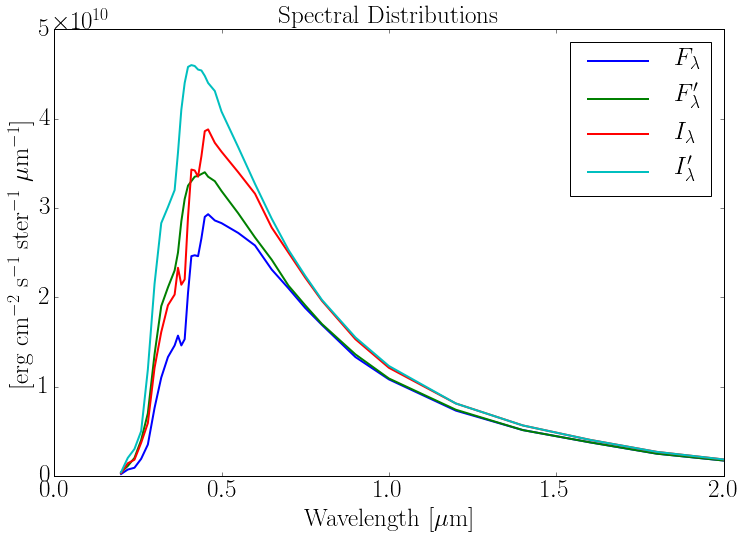

In [5]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Flam, lw=2.0, label=r"$F_{\lambda}$") 
ax0.plot(lam,Flamp, lw=2.0, label=r"$F_{\lambda}'$")      
ax0.plot(lam,Ilam, lw=2.0, label=r"$I_{\lambda}$") 
ax0.plot(lam,Ilamp, lw=2.0, label=r"$I_{\lambda}'$")      
ax0.legend()
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"[erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$]")
ax0.set_xlim([0,2])
ax0.set_title("Spectral Distributions")
plt.show()

In [6]:
print 'max(F_lam) =', "{:.1e}".format(np.max(Flam)), 'at', lam[np.max(Flam) == Flam][0], 'um'
print 'max(F_lam^c) =', "{:.1e}".format(np.max(Flamp)), 'at', lam[np.max(Flamp) == Flamp][0], 'um'
print 'max(I_lam) =', "{:.1e}".format(np.max(Ilam)), 'at', lam[np.max(Ilam) == Ilam][0], 'um'
print 'max(I_lam^c) =', "{:.1e}".format(np.max(Ilamp)), 'at', lam[np.max(Ilamp) == Ilamp][0], 'um'

max(F_lam) = 2.9e+10 at 0.46 um
max(F_lam^c) = 3.4e+10 at 0.45 um
max(I_lam) = 3.9e+10 at 0.46 um
max(I_lam^c) = 4.6e+10 at 0.41 um


**Explain why the four distributions share the same units and discuss the differences between them.**  

>The four distributions share the same units becasue $F_{\lambda}$, the "astrophysical" flux, is defined as $\pi F_{\lambda} = \mathcal{F_{\lambda}}$ where $\mathcal{F_{\lambda}}$ is the net outward flow of energy through a stellar surface element. This adds a "per steradian" to the units of the astrophysical flux, thus making it the intensity averaged over the stellar disk received by a distant observer.  

**Convert these spectral distributions into values per frequency bandwidth $\Delta \nu = 1$ Hz. Plot these also against wavelength. Check: peak $I_{\nu}^c = 4.21 \times 10^{-5}$ erg cm-2 s-1 ster-1 Hz-1 at $\lambda = 0.80 \mu$m.**  

>From basics we know that  
$$\nu =  \frac{c}{\lambda} \rightarrow d \nu = \frac{-c}{\lambda^2} d \lambda \rightarrow \Delta \nu = \frac{c}{\lambda^2} \Delta \lambda $$  
Thus the conversion factor is: 
$$ \frac{\Delta \lambda}{\Delta \nu} = \frac{\lambda^2}{c}$$  
with c in microns per second, in this case.

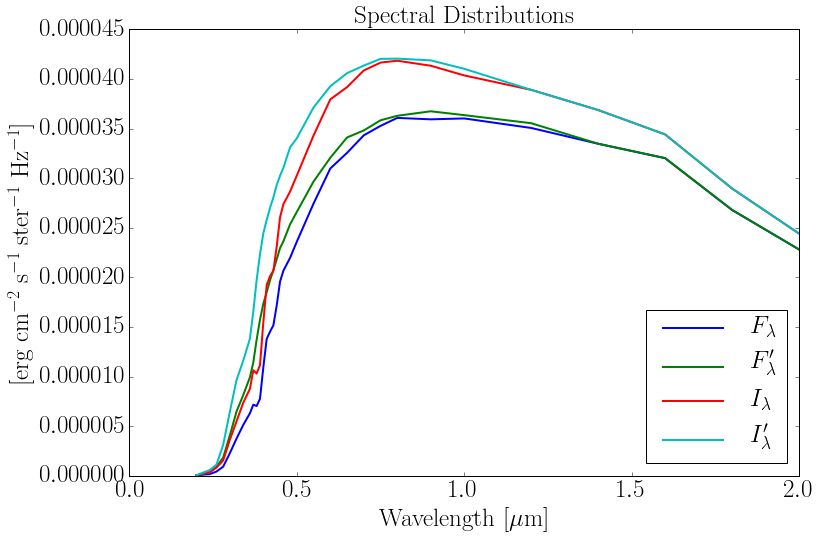

In [7]:
# Conversion factor
dldn = (lam**2.) / (c * 1e4)

# Apply conversion
Fnu = Flam * dldn
Fnup = Flamp * dldn
Inu = Ilam * dldn
Inup = Ilamp * dldn

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Fnu, lw=2.0, label=r"$F_{\lambda}$") 
ax0.plot(lam,Fnup, lw=2.0, label=r"$F_{\lambda}'$")      
ax0.plot(lam,Inu, lw=2.0, label=r"$I_{\lambda}$") 
ax0.plot(lam,Inup, lw=2.0, label=r"$I_{\lambda}'$")      
ax0.legend(loc=4)
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"[erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ Hz$^{-1}$]")
ax0.set_xlim([0,2])
ax0.set_title("Spectral Distributions")
plt.show()

In [8]:
print 'max(I_nu^c) =', "{:.2e}".format(np.max(Inup)), 'at', lam[np.max(Inup) == Inup][0], 'um'

max(I_nu^c) = 4.21e-05 at 0.8 um


**Write a function `planck` (or use your routine from Exercises “Stellar Spectra A: Basic Line Formation”, or use mine) that computes the Planck function in the same units. Try to fit a Planck function to the solar continuum intensity. What rough temperature estimate do you get?**

In [9]:
# Define planck function
def planck(temp, wav):
    # Takes temperature (K), and wavelength (microns)
    wav = wav * 1e-4     # Convert wav into cm
    blambda = (2. * h * c**2) / (wav**5) / (np.exp(h * c / (wav * k * temp)) - 1.0)
    return blambda*1e-4  # Change B_lambda into per micron

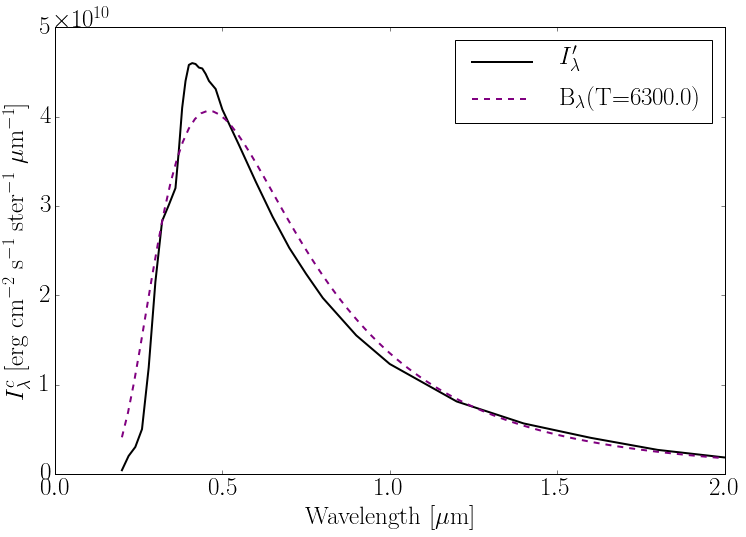

In [10]:
# Define wavelength array
wavelength = np.linspace(0.2,2.0,100)

# Compute planck function
T = 6300.
B = planck(T, wavelength)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Ilamp, lw=2.0, c='k', label=r"$I_{\lambda}'$")    
ax0.plot(wavelength,B, lw=2.0, c='purple', ls='--', label=r"B$_{\lambda}$(T=%s)" %T)      
ax0.legend()
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"$I_{\lambda}^{c}$  [erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$]")
ax0.set_xlim([0,2])
plt.show()

**Invert the Planck function analytically to obtain an equation which converts an intensity distribution $I_{\lambda}$ into brightness temperature $T_b$ (defined by $B_{\lambda}(T_b) \equiv I_{\lambda}$).**  

>Typically, we derive the brightness temperature in the Rayleigh-Jeans limit ($h \nu << K T$) where we can take
$$ \exp \left ( \frac{h c}{\lambda k T} \right ) \approx 1 + \frac{h c}{\lambda k T} $$  
so then
$$B_{\lambda} = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp \left ( \frac{h c}{\lambda k T} \right )-1} \approx \frac{2 c k T}{\lambda^4} $$  
Solving for $T$ we get the brightness temperature in terms of wavelength:  
$$ T_b \approx \frac{B_{\lambda} \lambda^4}{2 k c} $$  
However, here it looks like Rutten would like us to just invert the Planck equation to get  
$$ T_b = \frac{hc}{\lambda k \ln \left ( \frac{2 h c^2}{\lambda^5 B_{\lambda}} +  1 \right )} $$

**Code it as a function and use that to plot the brightness temperature of the solar continuum against wavelength. Discuss the shape of this curve. It peaks near 1.6 microns. What does that mean for the radiation escape at this wavelength?**

In [11]:
def brighttemp(wav,intensity):
    wavcm = wav * 1e-4        # change wav into cm
    intcm = intensity * 1e4   # change into per cm bandwidth
    tempbright = h*c / (wavcm*k) / np.log(2.*h*c**2./(intcm*wavcm**5)+1.0)

    return tempbright

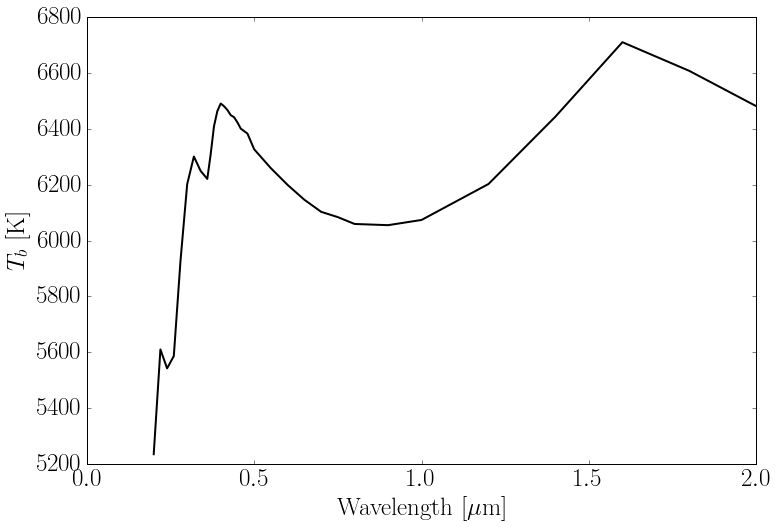

In [12]:
# Calculate Brightness Temperatures for the solar continuum
B_T = brighttemp(lam, Ilamp)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,B_T, lw=2.0, c='k')    
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"$T_b$ [K]")
ax0.set_xlim([0,2])
plt.show()

>The Brightness Temperature curve has two peaks: one local peak (6500 K) at around 0.75 microns and a global maximum (6700 K) around 1.6 microns. Between the two peaks is a local minimum (6000 K) at around 0.9 microns. The radiation escaping at the wavelength of peak brightness temperature around 1.6 microns is coming from a hotter, deeper region in the stellar atmosphere. The stellar atmosphere is likely optically thin at this wavelength. 

## 2. Continuous extinction  
**Pull exthmin.pro over and compare it to Gray’s formulation.** 
>What does Rutten mean here? Below I've 

In [13]:
def exthmin(wav,temp,eldens, check=False):
    # physics constants in cgs (all cm)
    kcgs=k    # Boltzmann constant (erg/K; double precision)
    hcgs=h    # Planck constant (erg s)
    ccgs=c    # velocity of light (cm/s)

    # other parameters
    #wav=float(wav)
    theta=5040./temp
    elpress=eldens*kcgs*temp

    # evaluate H-min bound-free per H-min ion = Gray (8.11)
    # his alpha = my sigma in NGSB/AFYC (per particle without stimulated)
    sigmabf = 1.99654 -1.18267E-5*wav +2.64243E-6*wav**2 -4.40524E-10*wav**3 \
            +3.23992E-14*wav**4 -1.39568E-18*wav**5 +2.78701E-23*wav**6
    sigmabf=sigmabf*1e-18  # cm^2 per H-min ion
    if np.sum((wav > 16444)): 
        sigmabf[wav > 16444] = 0.  
    # H-min ionization limit 
    # This Krijger trick to permit array input

    # convert into bound-free per neutral H atom assuming Saha = Gray p135
    # units: cm2 per neutral H atom in whatever level (whole stage)
    graysaha=4.158e-10*elpress*theta**2.5*10.**(0.754*theta) # Gray (8.12)
    kappabf=sigmabf*graysaha                                 # per neutral H atom
    kappabf=kappabf*(1.-np.exp(-hcgs*ccgs/(wav*1e-8*kcgs*temp))) 
    # correct stimulated emission

    # check Gray's Saha-Boltzmann with AFYC (edition 1999) p168
    if check:
        logratio=-0.1761-np.log10(elpress)+np.log10(2.)+2.5*np.log10(temp)-theta*0.754
        print'Hmin/H ratio=',1/(10.**logratio) # OK, same as Gray factor SB

    # evaluate H-min free-free including stimulated emission = Gray p136
    lwav=np.log10(wav)
    f0 =  -2.2763 -1.6850*lwav +0.76661*lwav**2 -0.0533464*lwav**3
    f1 =  15.2827 -9.2846*lwav +1.99381*lwav**2 -0.142631*lwav**3
    f2 = -197.789 +190.266*lwav -67.9775*lwav**2 +10.6913*lwav**3 -0.625151*lwav**4
    ltheta=np.log10(theta)
    kappaff = 1e-26*elpress*10**(f0+f1*ltheta+f2*ltheta**2)   # Gray (8.13)

    return kappabf+kappaff

**Plot the wavelength variation of the H- extinction for the FALC parameters at h = 0 km (see Tables 3-
4). This plot reproduces the result of Chandrasekhar & Breen (1946). Compare it to Gray’s version in Figure 5.**  
>We'll read-in the `falc.dat` file from the last lab for the electron density

In [14]:
! head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [15]:
# Read-in FALC model
falc = np.genfromtxt('falc.dat', skip_header=4)
height = falc[:,0]
temp = falc[:,3]
nel = falc[:,7]

In [16]:
print 'temperature =', temp[-11], 'K  at  h =', height[-11]

temperature = 6520.0 K  at  h = 0.0


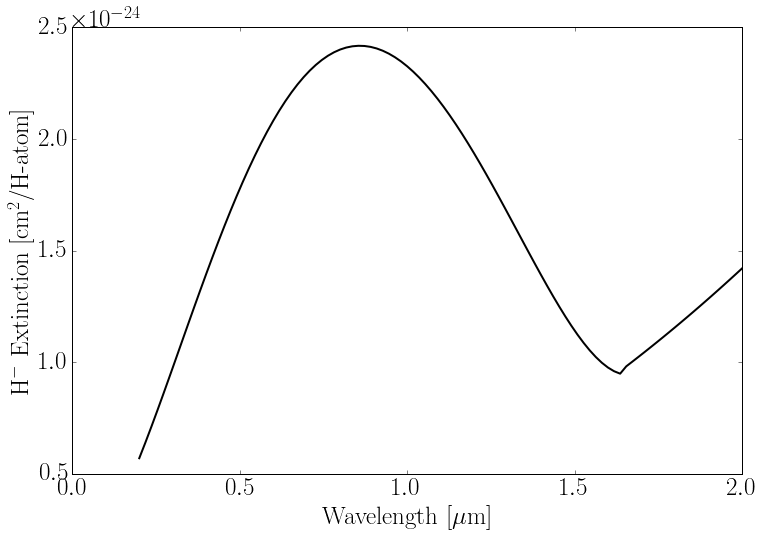

In [17]:
# Calculate H- extinction
Hmin = exthmin(wavelength*1e4, temp[-11], nel[-11])

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wavelength,Hmin, lw=2.0, c='k')    
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"H$^{-}$ Extinction [cm$^2$/H-atom]")
ax0.set_xlim([0,2])
plt.show()

>The above plot matches the sum of the H$^{-}_{bf}$ and H$^{-}_{ff}$ curves in figure 5 of Rutten, which makes sense because that is exactly what our `exthmin()` function computes.   

**Hydrogenic bound-free edges behave just as HI with maximum extinction at the ionization limit and decay $\sim \lambda^3$ for smaller wavelengths, as indeed shown by the HI curve in Figure 5. The H− bound-free extinction differs strongly from this pattern. Why is it not hydrogenic although due to hydrogen?**  

>Answ